# Digital Assignment 1 Machine Learning - Data Preprocessing And Exploratory Data Analysis
## By Group 02
- Adithya Nair - AID23002
- Avighna Reddy Katipally - AID23005
- P Ananthapadmanabhan Nair - AID23036

**Dataset used -** The dataset used in the assignment is a csv file of the global economy indicators of all the major political regions of our world tracked at various points in time.

[Dataset can be found here](https://www.kaggle.com/datasets/prasad22/global-economy-indicators)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('GlobalEconomyIndicators.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0    CountryID                                                                                  10512 non-null  int64  
 1    Country                                                                                    10512 non-null  object 
 2    Year                                                                                       10512 non-null  int64  
 3    AMA exchange rate                                                                          10512 non-null  float64
 4    IMF based exchange rate                                                                    10512 non-null  float64
 5    Population                            

# Data Cleaning

## Dealing with Missing Values

In [4]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
CountryID                                                                                       0
Country                                                                                         0
Year                                                                                            0
AMA exchange rate                                                                               0
IMF based exchange rate                                                                         0
Population                                                                                      0
Currency                                                                                        0
Per capita GNI                                                                                  0
Agriculture, hunting, forestry, fishing (ISIC A-B)                                            121
Changes in inventories                                                                

As seen here, there are missing values located in several columns, we proceed by opting to replace the missing values found in 'Changes In Inventories' with the mean(since it is a continuous feature).

Now we delete the rows with missing values, found in the other columns.

In [5]:
df[' Changes in inventories '] = df[' Changes in inventories '].fillna(df[' Changes in inventories '].mean())
print("\n Missing values in 'Changes in inventories' column after filling with mean:" , df[' Changes in inventories '].isnull().sum())

df.dropna()
print("\n Missing values in each column after handling them:")
print(df.isnull().sum())



 Missing values in 'Changes in inventories' column after filling with mean: 0

 Missing values in each column after handling them:
CountryID                                                                                      0
Country                                                                                        0
Year                                                                                           0
AMA exchange rate                                                                              0
IMF based exchange rate                                                                        0
Population                                                                                     0
Currency                                                                                       0
Per capita GNI                                                                                 0
Agriculture, hunting, forestry, fishing (ISIC A-B)                                          

## Duplicates

In [6]:
duplicate_rows = df[df.duplicated()]
print("Number of Duplicate Rows = " , duplicate_rows.shape)

df = df.drop_duplicates()
print("Size of the Dataset after removing the duplicates = " , df.shape)

Number of Duplicate Rows =  (0, 26)
Size of the Dataset after removing the duplicates =  (10512, 26)


There are no duplicates in this dataset, no further action needs to be taken. 

# Normalisation

In [7]:
exclude_columns = [' CountryID ',' Country ',' Currency '] #categorical columns
column = df.drop(columns=exclude_columns).columns.tolist() #numerical columns

range_of_columns = df[column].max() - df[column].min()
print(range_of_columns)

Year                                                                                         5.100000e+01
AMA exchange rate                                                                            1.116366e+05
IMF based exchange rate                                                                      4.200000e+04
Population                                                                                   1.425889e+09
Per capita GNI                                                                               2.342830e+05
Agriculture, hunting, forestry, fishing (ISIC A-B)                                           1.350000e+12
Changes in inventories                                                                       3.620000e+11
Construction (ISIC F)                                                                        1.240000e+12
Exports of goods and services                                                                3.531670e+12
Final consumption expenditure                 

The data found in this dataset firmly exists in ranges which demand normalization. We proceed by normalizing the values except for the 3 categorical features as noted above.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_normalize = column[1:]
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

range_of_columns = df[column].max() - df[column].min()
print(range_of_columns)

Year                                                                                         51.000000
AMA exchange rate                                                                            48.727940
IMF based exchange rate                                                                      21.629805
Population                                                                                   12.494190
Per capita GNI                                                                               13.725326
Agriculture, hunting, forestry, fishing (ISIC A-B)                                           33.464260
Changes in inventories                                                                       44.624753
Construction (ISIC F)                                                                        24.872828
Exports of goods and services                                                                20.195126
Final consumption expenditure                                            

# Handling Categorical Data
## Label Encoding
We have taken the countries and converted them into a categorical value readable by the machine as well as the currency

In [9]:
from sklearn.preprocessing import LabelEncoder


columns_to_encode = [' CountryID ',' Country ',' Currency ']
label_encoder = LabelEncoder()

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])
    print(df[col])

0          0
1          0
2          0
3          0
4          0
        ... 
10507    219
10508    219
10509    219
10510    219
10511    219
Name:  CountryID , Length: 10512, dtype: int64
0          0
1          0
2          0
3          0
4          0
        ... 
10507    217
10508    217
10509    217
10510    217
10511    217
Name:  Country , Length: 10512, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
10507    70
10508    70
10509    70
10510    70
10511    70
Name:  Currency , Length: 10512, dtype: int64


# Exploratory Data Analysis (EDA) and Outliers
## Plotting box plots for each numeric column


In [10]:
len(column)+3

26

CountryID                                                                                       Axes(0.125,0.83;0.352273x0.05)
Country                                                                                      Axes(0.547727,0.83;0.352273x0.05)
Year                                                                                            Axes(0.125,0.77;0.352273x0.05)
AMA exchange rate                                                                            Axes(0.547727,0.77;0.352273x0.05)
IMF based exchange rate                                                                         Axes(0.125,0.71;0.352273x0.05)
Population                                                                                   Axes(0.547727,0.71;0.352273x0.05)
Currency                                                                                        Axes(0.125,0.65;0.352273x0.05)
Per capita GNI                                                                               Axes(0.547727,0.65

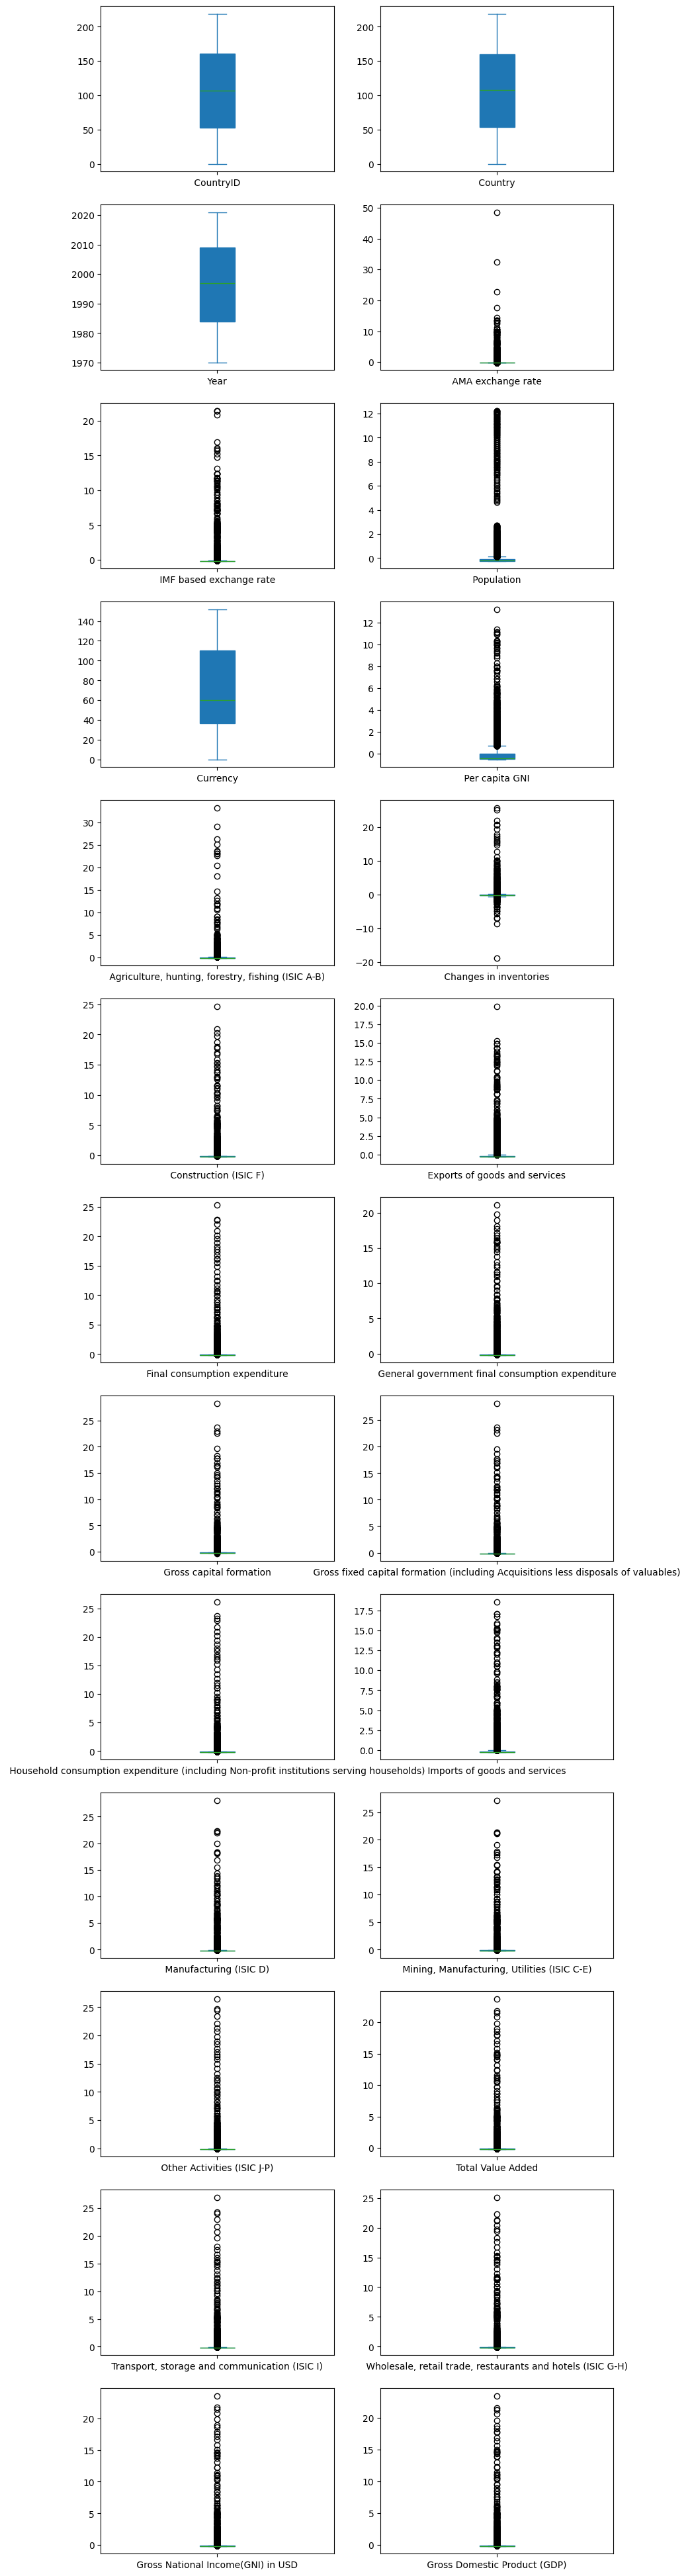

In [11]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns].plot(kind='box', subplots=True, layout=(13, 2), figsize=(10, 50), patch_artist=True)

## Calculating outliers for each feature

In [12]:
for col in column:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers_lower = df[col] < lower_bound
        outliers_upper = df[col] > upper_bound

        # Transform outliers by capping them at the bounds
        df.loc[outliers_lower, col] = lower_bound
        df.loc[outliers_upper, col] = upper_bound

        print(f"Column: {col}")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(f"Number of lower outliers: {outliers_lower.sum()}")
        print(f"Number of upper outliers: {outliers_upper.sum()}\n")

Column:  Year 
Lower Bound: 1946.5, Upper Bound: 2046.5
Number of lower outliers: 0
Number of upper outliers: 0

Column:  AMA exchange rate 
Lower Bound: -0.18852337282591658, Upper Bound: -0.10062682260943201
Number of lower outliers: 0
Number of upper outliers: 1916

Column:  IMF based exchange rate 
Lower Bound: -0.21196431014688188, Upper Bound: -0.11500748825343876
Number of lower outliers: 0
Number of upper outliers: 1946

Column:  Population 
Lower Bound: -0.45665611295000086, Upper Bound: 0.10958877688856455
Number of lower outliers: 0
Number of upper outliers: 1350

Column:  Per capita GNI 
Lower Bound: -1.2062050749277657, Upper Bound: 0.7237404241001171
Number of lower outliers: 0
Number of upper outliers: 1340

Column:  Agriculture, hunting, forestry, fishing (ISIC A-B) 
Lower Bound: -0.3346939332225747, Upper Bound: 0.05129760193180735
Number of lower outliers: 0
Number of upper outliers: 1415

Column:  Changes in inventories 
Lower Bound: -0.5000653766322178, Upper Bound:

C:\Users\katip\AppData\Local\Temp\ipykernel_9384\2101343669.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1946.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers_lower, col] = lower_bound


All these features have outliers in their dataset, but the amount of outliers is quite significant, since it captures a lot of nuanced data about the economics of countries, since we're looking at real world data here, the existence of a large number of outliers implies a pattern within the system that the models we run can immediately identify and fit towards. Thus we opt not to remove the outliers in the model

CountryID                                                                                       Axes(0.125,0.83;0.352273x0.05)
Country                                                                                      Axes(0.547727,0.83;0.352273x0.05)
Year                                                                                            Axes(0.125,0.77;0.352273x0.05)
AMA exchange rate                                                                            Axes(0.547727,0.77;0.352273x0.05)
IMF based exchange rate                                                                         Axes(0.125,0.71;0.352273x0.05)
Population                                                                                   Axes(0.547727,0.71;0.352273x0.05)
Currency                                                                                        Axes(0.125,0.65;0.352273x0.05)
Per capita GNI                                                                               Axes(0.547727,0.65

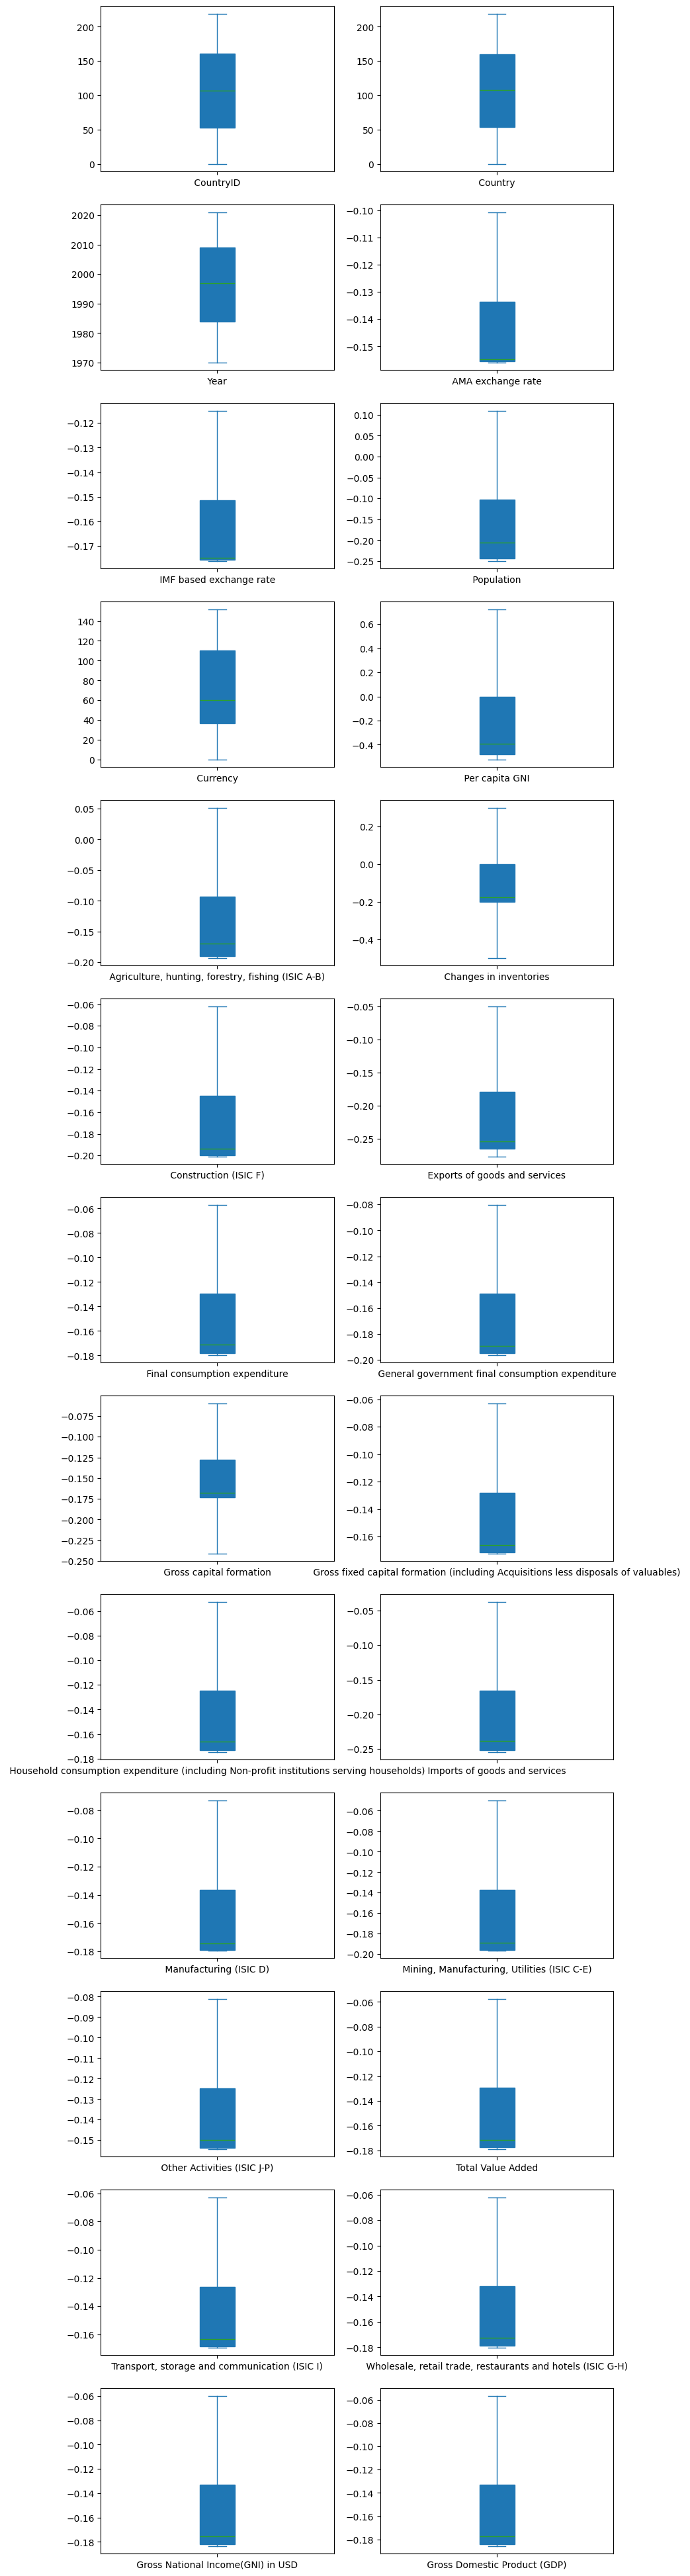

In [13]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns].plot(kind='box', subplots=True, layout=(13, 2), figsize=(10, 50), patch_artist=True)

# Data Visualization
## Distribution of numerical columns


Distribution of numerical columns:


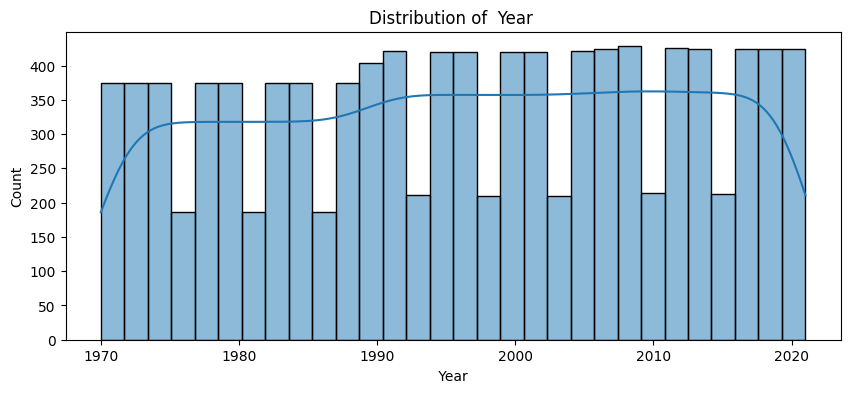

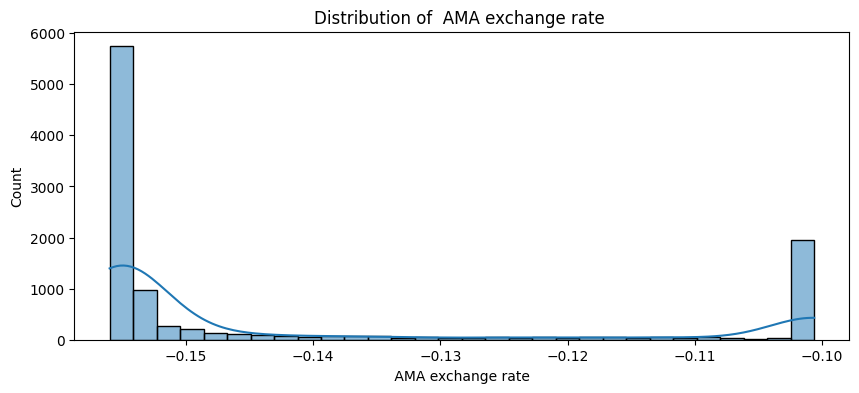

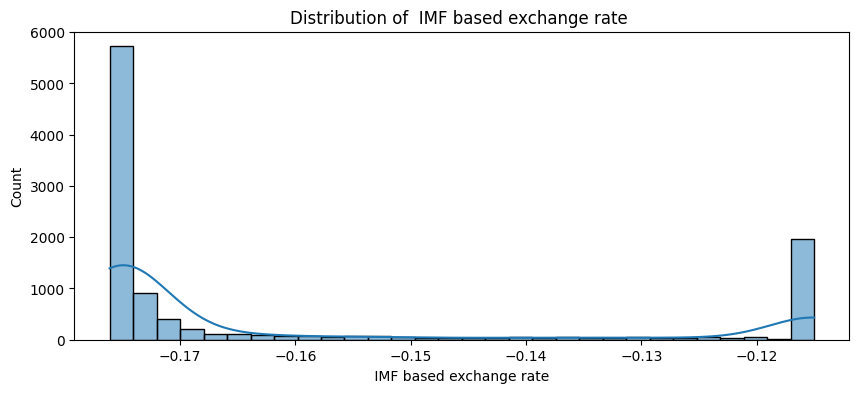

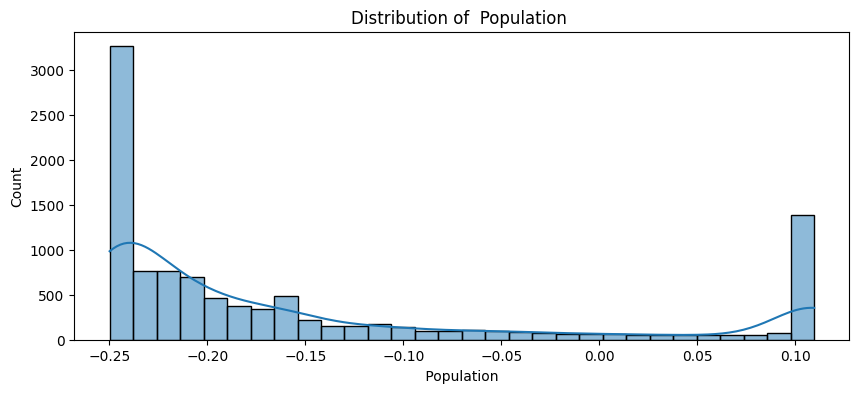

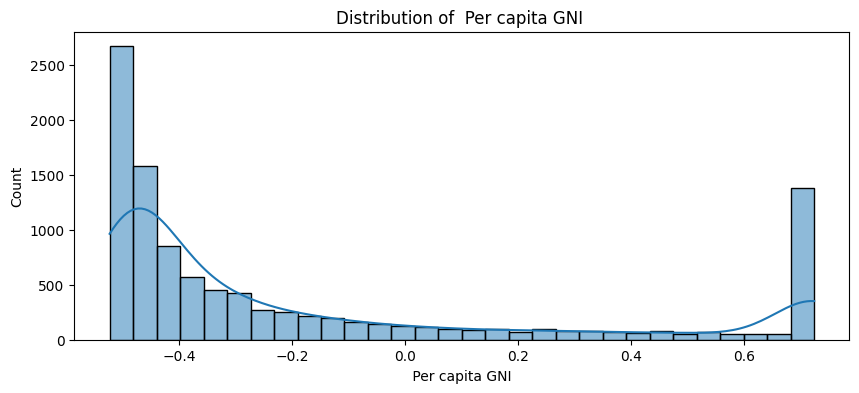

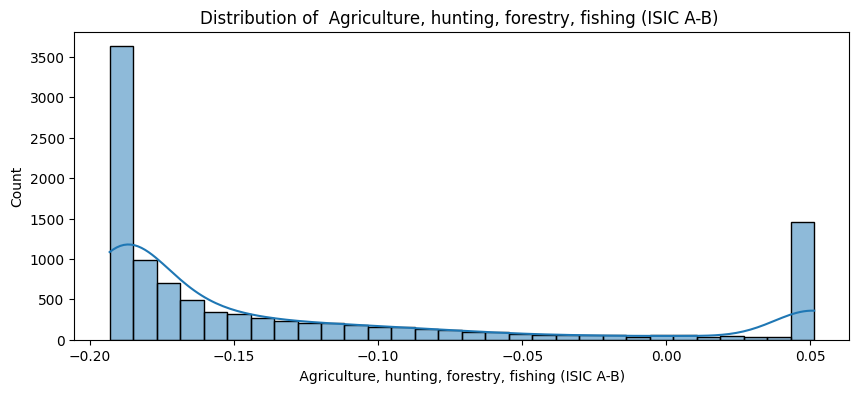

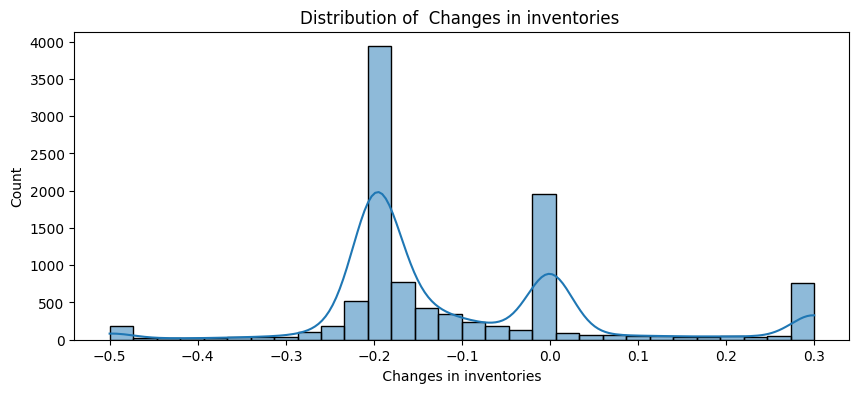

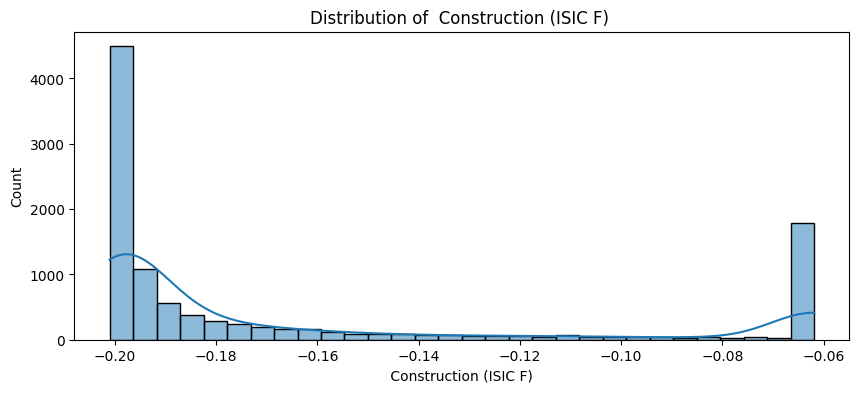

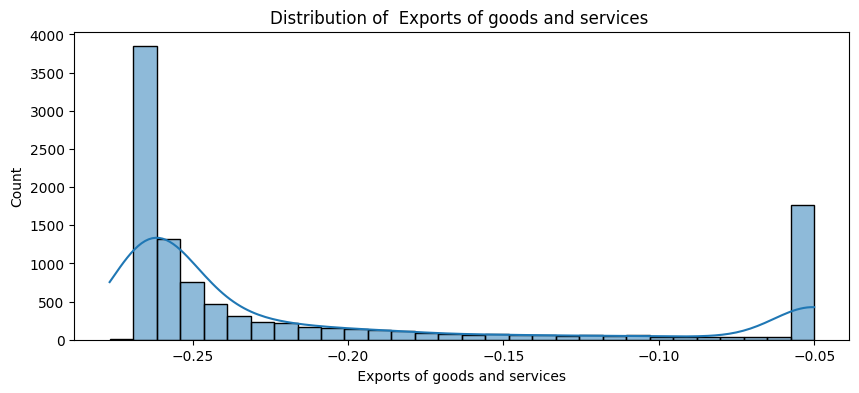

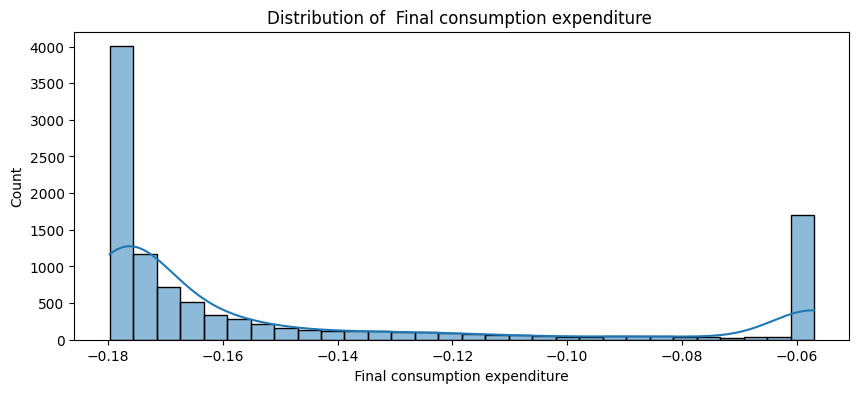

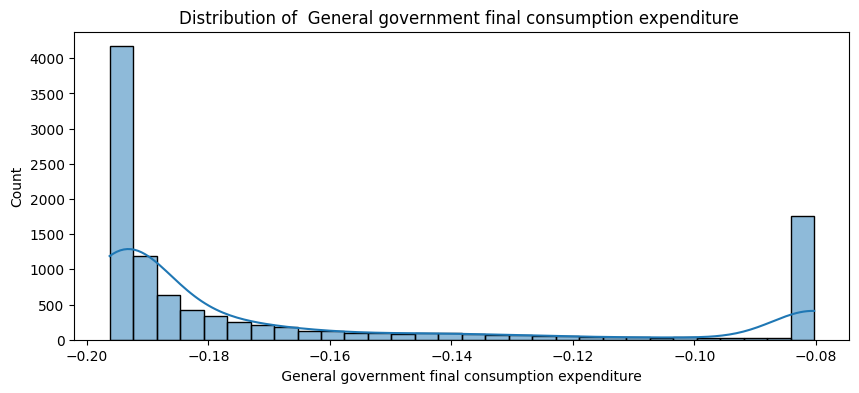

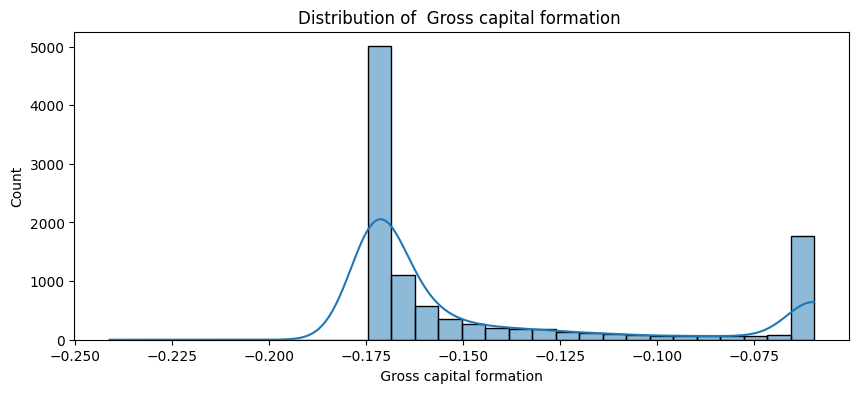

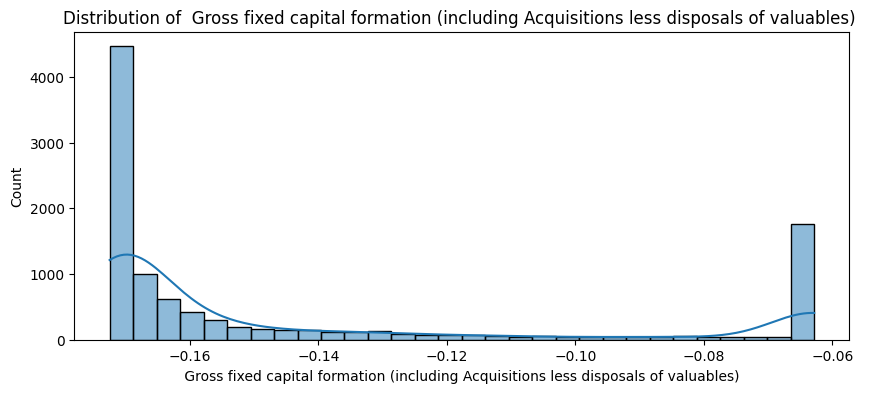

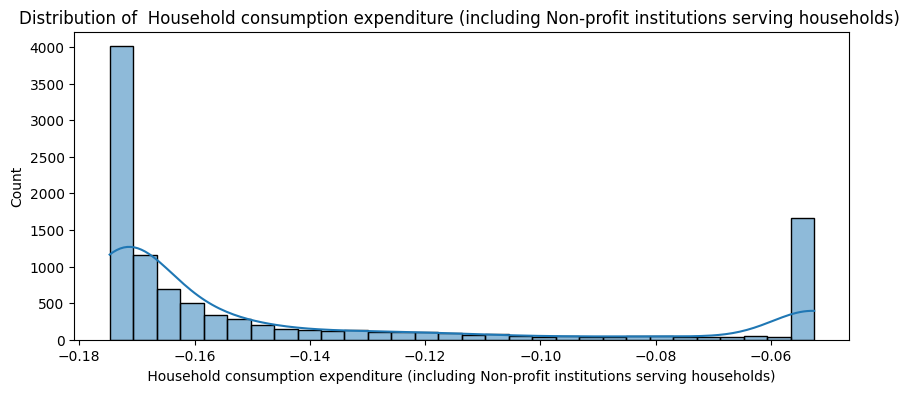

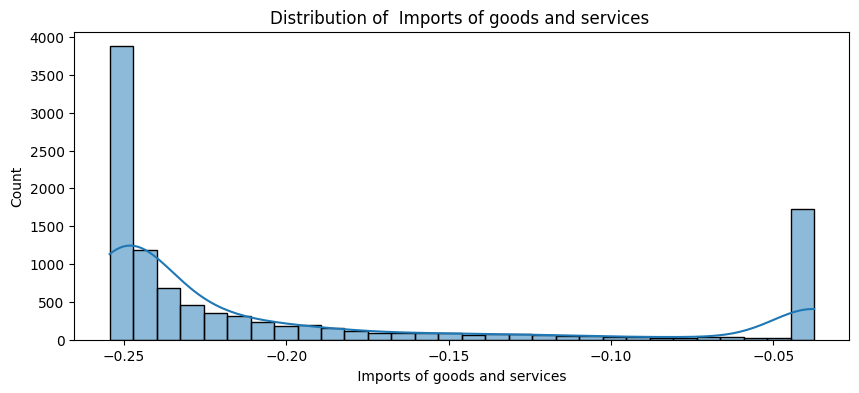

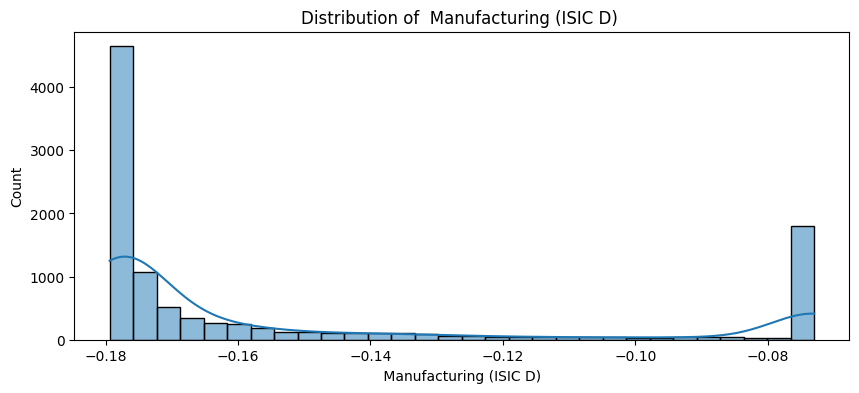

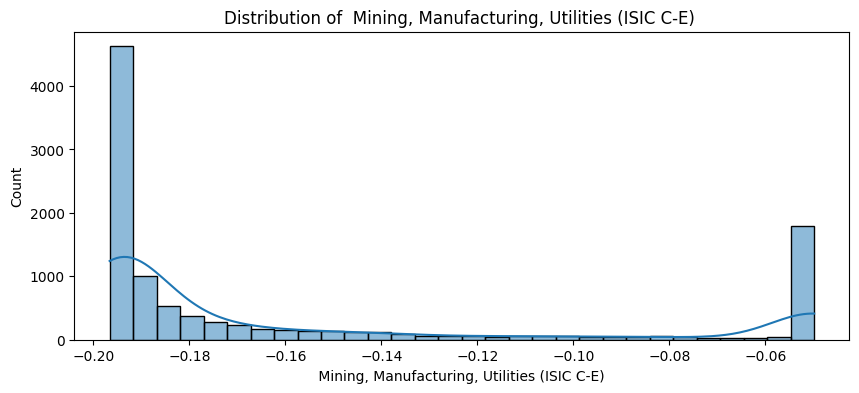

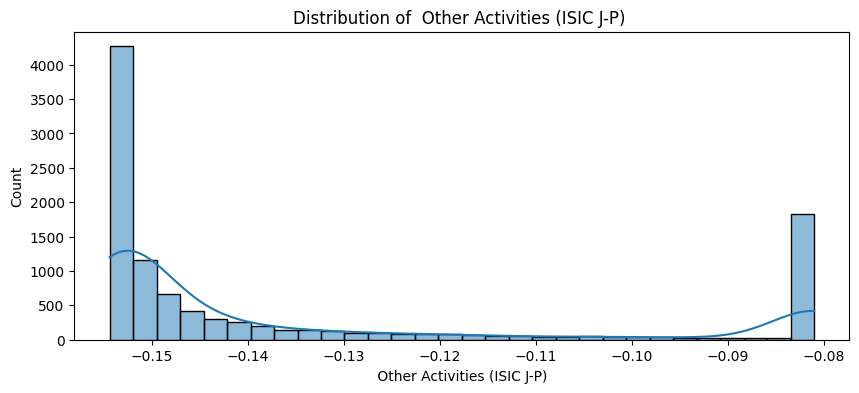

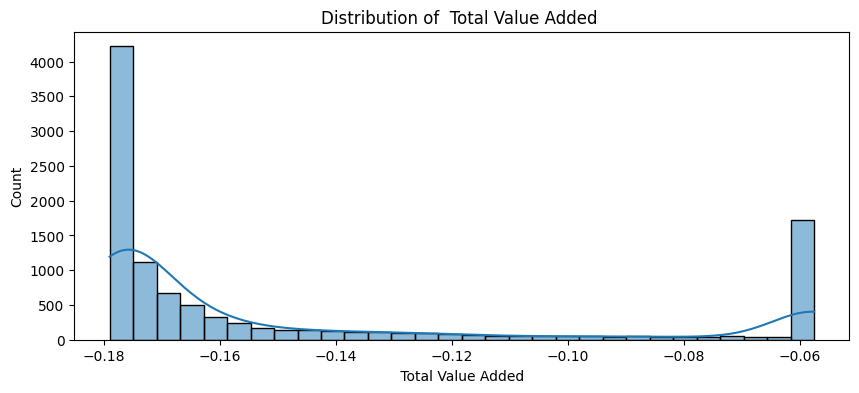

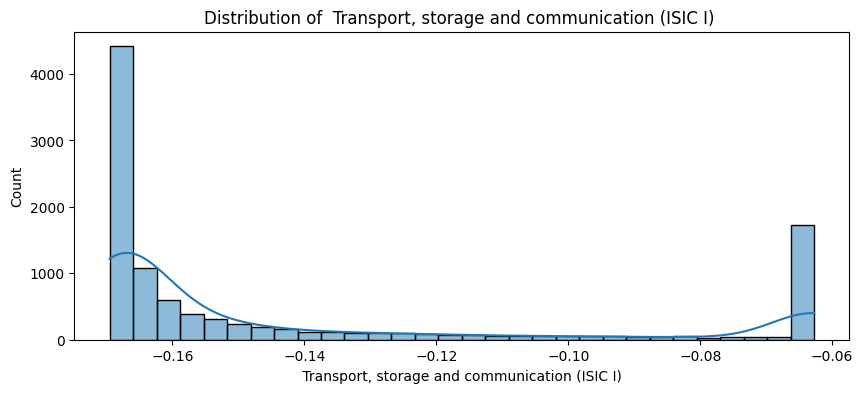

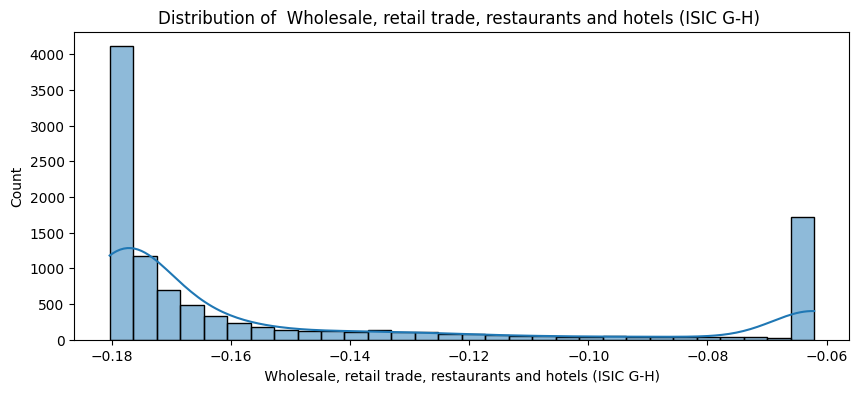

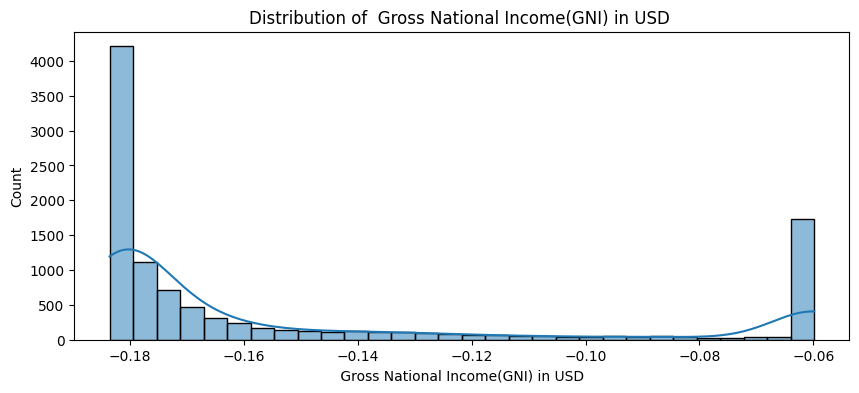

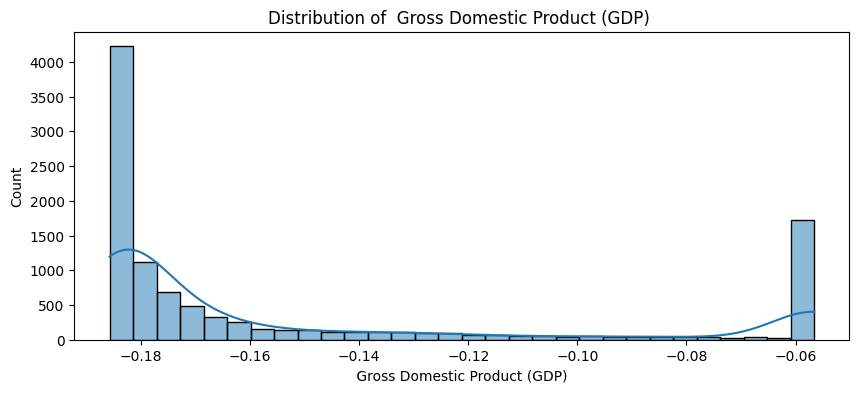

In [14]:
print("\nDistribution of numerical columns:")
for col in column:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

The distributions vary widely due to the presence of outliers, which we have elected to not remove

## Distribution of categorical columns


 Distribution of categorical columns:


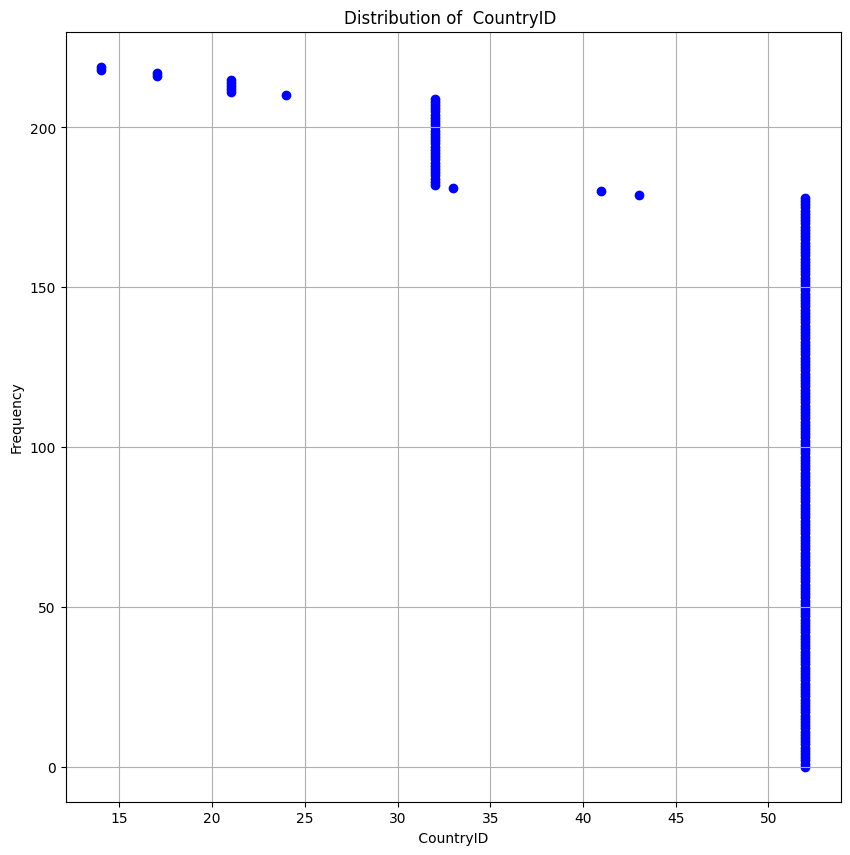

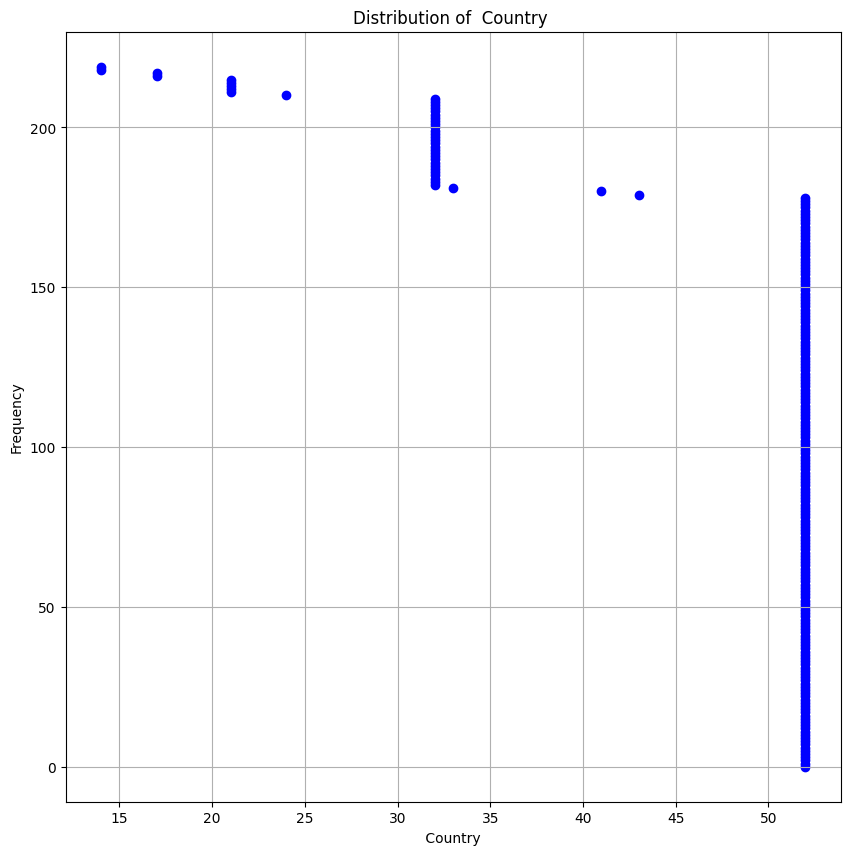

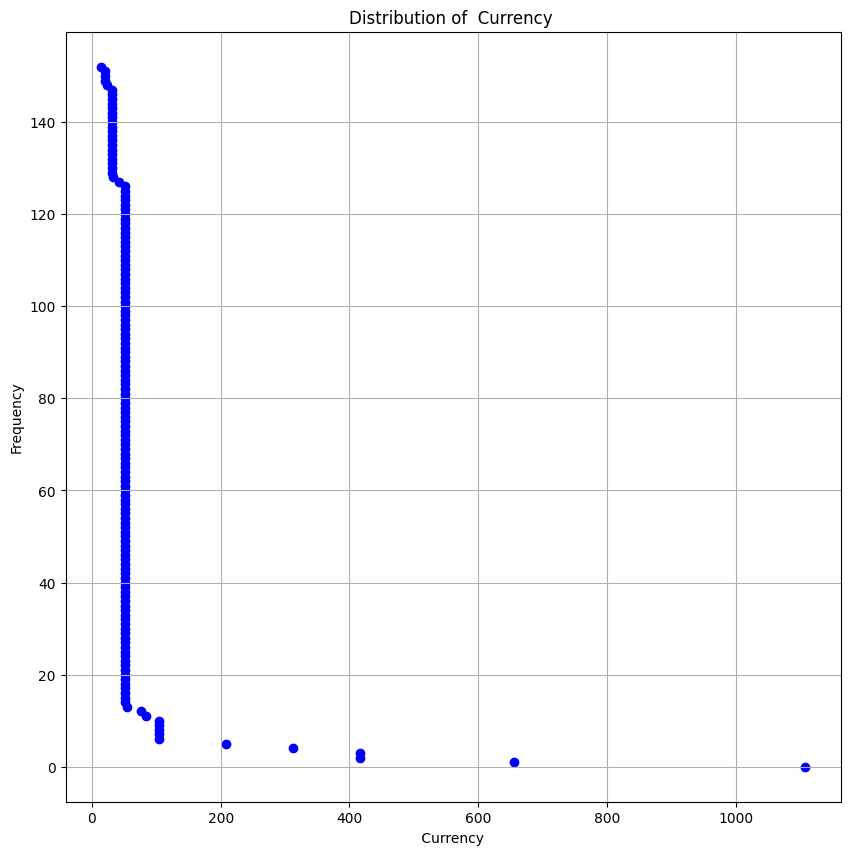

In [15]:
print("\n Distribution of categorical columns:")
for col in exclude_columns:
    
    """ plt.figure(figsize=(30,30))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show() """
    
    plt.figure(figsize=(10,10))
    vc = df[col].value_counts()
    y = list(range(0,  len(vc)))
    plt.scatter(vc, y, marker='o', linestyle='-', color='b')
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}') #from label encoding, we get the categories from 0 to 1
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Correlation Analysis

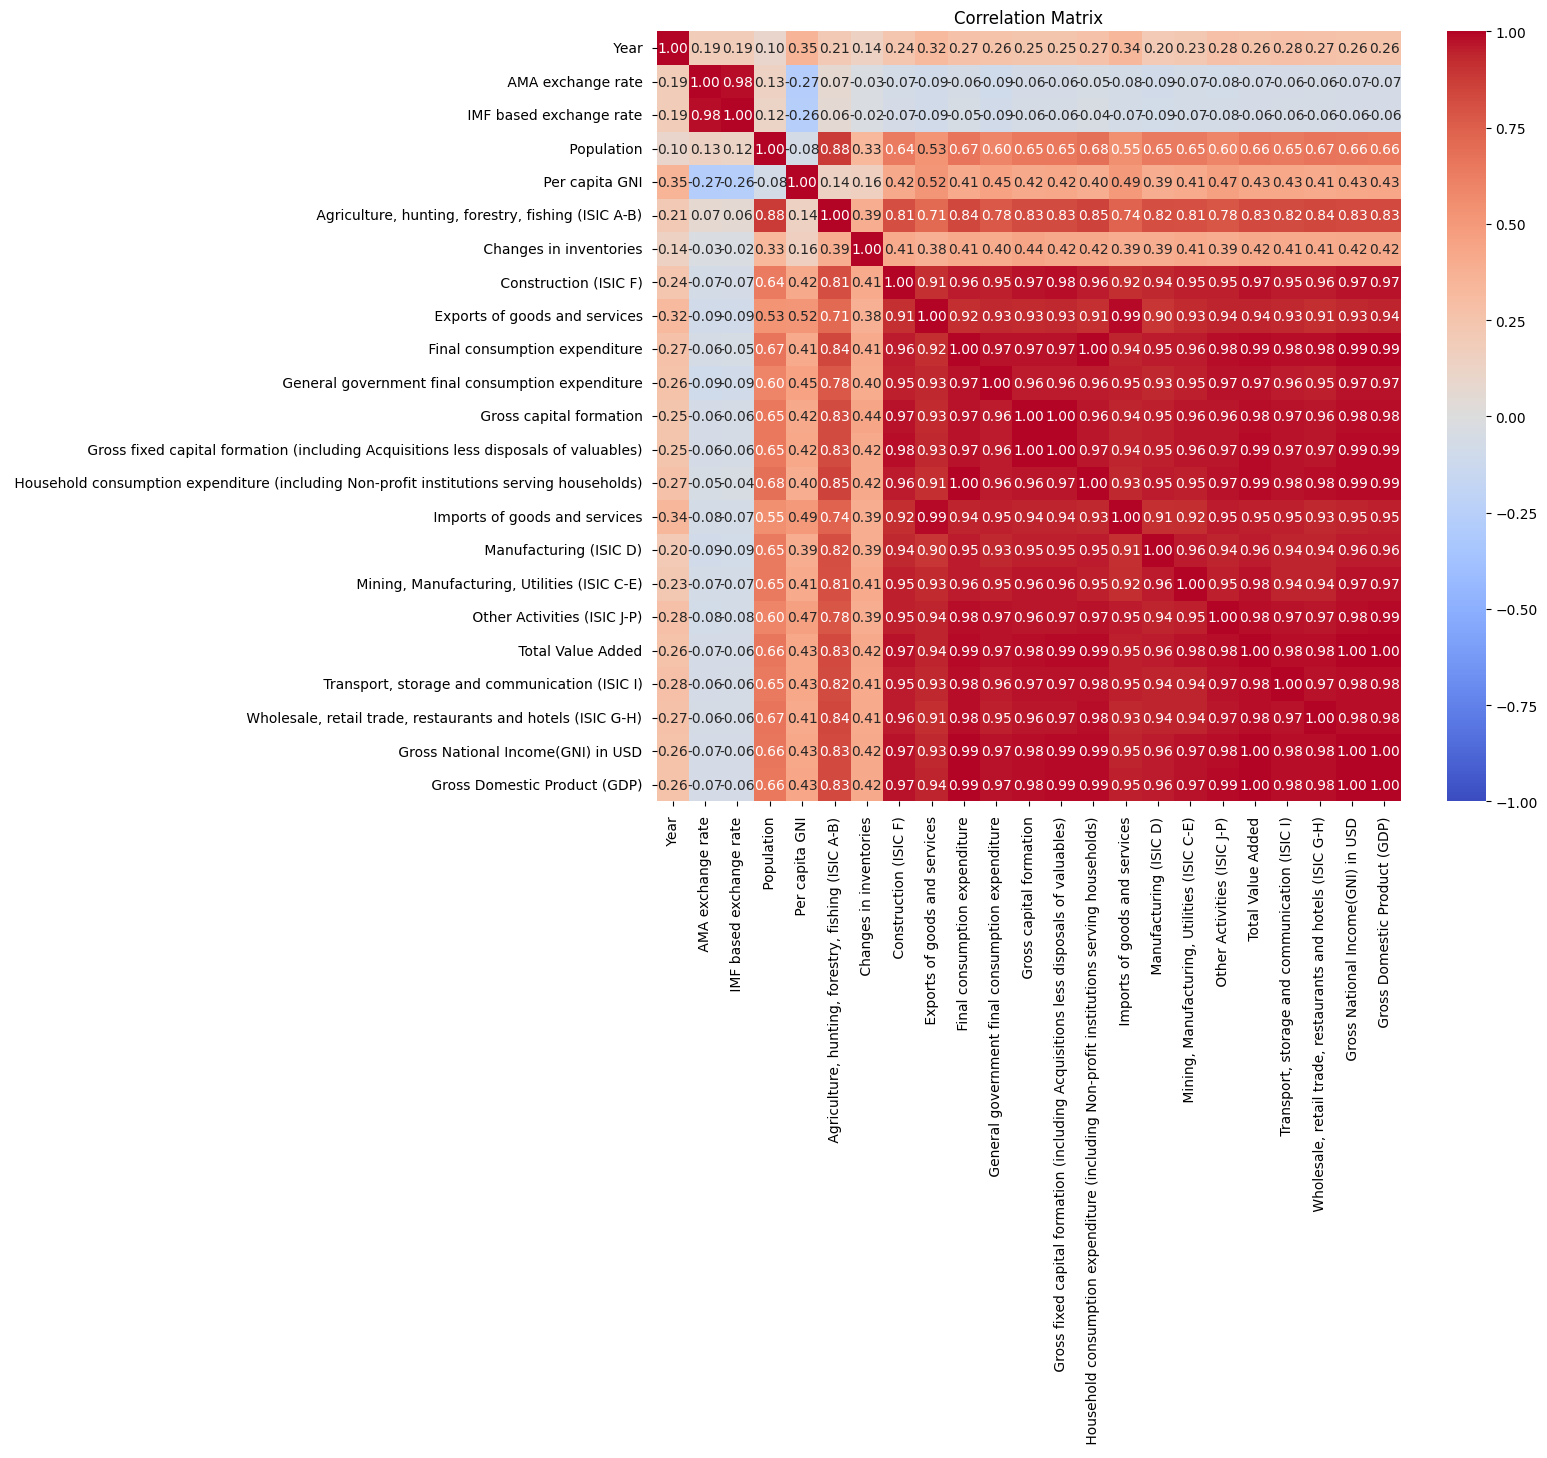

In [17]:
corr_matrix = df[column].corr()
plt.figure(figsize=(12,10))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

What we find upon generating the correlation matrix is that many of the features are largely tied to each other.

This matches our intuition of how these features tend to move, since many economic indicators of a country are tied to each other. A country's economic status impacts its import capabilities which impact the value added, which affects the expenditure and GDP and so on.